<a href="https://colab.research.google.com/github/juampa795/Data_Science/blob/main/Visualizaciones_Morales_Juan_Pablo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segunda Entrega: Visualizaciones

Se utilizará para este proyecto la 1era opción de Dataset: Modelo de retención de clientes, el mismo presenta información que nos permitirá determinar el grado en que nuestros clientes pueden dejar de utilizar nuestros productos bancarios

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/juampa795/Data_Science/main/Churn_Modelling.csv'
df = pd.read_csv(url, index_col=0)

df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


Gráficos con Matplotlib

In [2]:
#Importando libreria de Matlplotlib
import matplotlib as mp
import matplotlib.pyplot as plt
#mp.style.use ('bmh')  cuando quiera cambiar los stilos

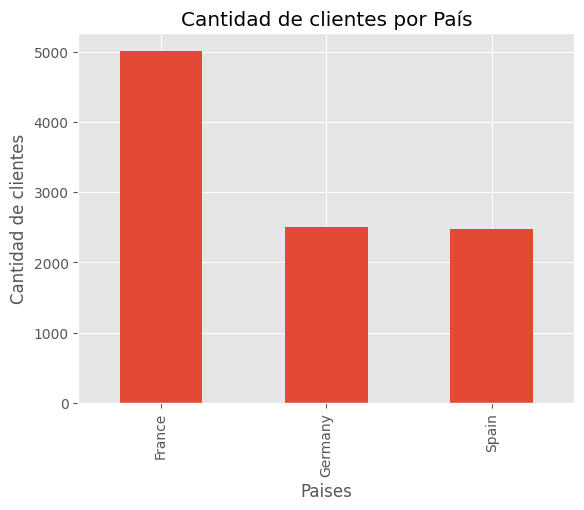

In [5]:
#value_counts() Cuenta la cantidad de veces que se repite cada uno de los paises
df['Geography'].value_counts(ascending=False).plot(kind = 'bar')
plt.title('Cantidad de clientes por País')
plt.xlabel('Paises')
plt.ylabel('Cantidad de clientes')
mp.style.use('ggplot')

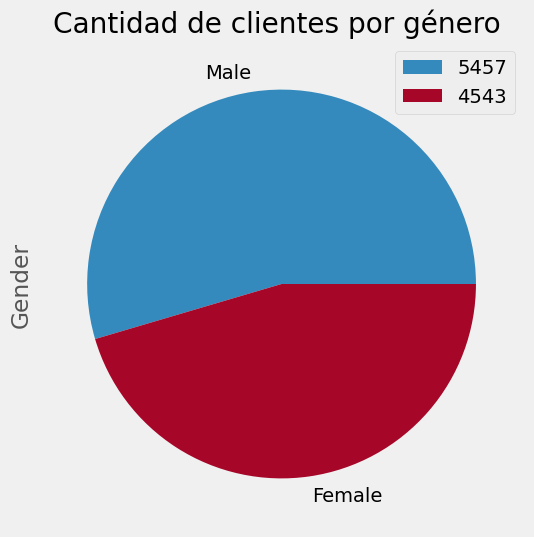

In [19]:
df['Gender'].value_counts().plot(kind = 'pie', figsize = (14,6))
plt.title('Cantidad de clientes por género ')
plt.legend(df['Gender'].value_counts(), loc='upper right')
mp.style.use('bmh')

In [54]:
df[df['Exited']==0].Age #Si df['Exited]==0 es falso no se fue del banco y quiero que me diga la edad del cliente

RowNumber
2        41
4        39
5        43
7        50
9        44
         ..
9994     28
9995     29
9996     39
9997     35
10000    28
Name: Age, Length: 7963, dtype: int64

In [55]:
df[df['Exited']==1].Age #Si df['Exited]==0 es falso se fue del banco y quiero que me diga la edad

RowNumber
1       42
3       42
6       44
8       29
17      58
        ..
9982    42
9983    46
9992    53
9998    36
9999    42
Name: Age, Length: 2037, dtype: int64

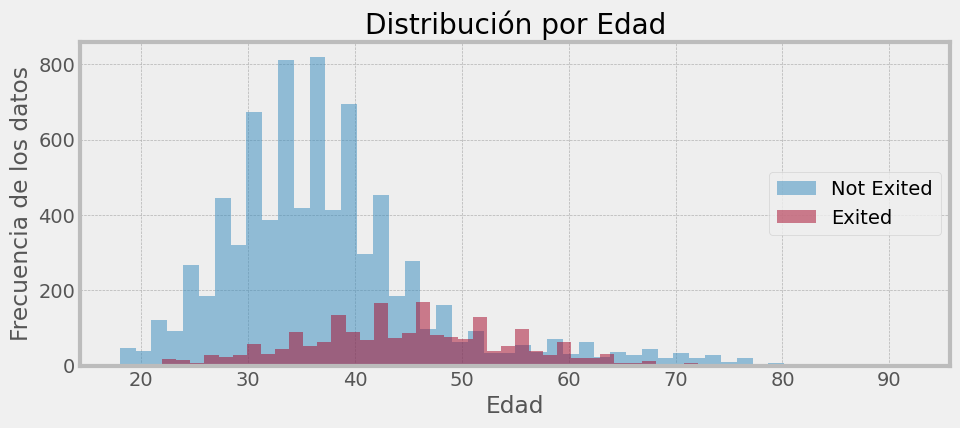

In [50]:
plt.figure(figsize=(10,4))
plt.hist(df[df['Exited']==0].Age, bins=50, alpha=0.5, label='Not Exited') #grafico la distribución de quines no abandonaron el banco
plt.hist(df[df['Exited']==1].Age, bins=50, alpha=0.5, label='Exited') #grafico la distribución de quines si abandonaron el banco
plt.title('Distribución por Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia de los datos')
plt.legend(loc='center right')

RowNumber
2        41
4        39
5        43
7        50
9        44
         ..
9994     28
9995     29
9996     39
9997     35
10000    28
Name: Age, Length: 7963, dtype: int64